In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('Google_Stock_Price_Train.csv')
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

In [13]:
df.head()

,Date,Open,High,Low,Close,Volume,MACD,Signal_Line,up,down,RSI,SMA,EMA
2012-03-01,03-01-2012,325.25,332.83,324.97,663.59,"73,80,500",0.000000,0.000000,NaN,NaN,NaN,NaN,325.250000
2012-04-01,04-01-2012,331.27,333.87,329.08,666.45,"57,49,400",0.480228,0.096046,6.02,0.00,NaN,NaN,325.823333
2012-05-01,05-01-2012,329.83,330.75,326.89,657.21,"65,90,300",0.736130,0.224063,0.00,-1.44,NaN,NaN,326.204921
2012-06-01,06-01-2012,328.34,328.77,323.68,648.24,"54,05,900",0.809374,0.341125,0.00,-1.49,NaN,NaN,326.408262
2012-09-01,09-01-2012,322.04,322.29,309.46,620.76,"1,16,88,800",0.354972,0.343894,0.00,-6.30,NaN,NaN,325.992237


In [4]:
#create function to calculate the SMA & EMA
#create the Simple Moving Average(SMA)
def SMA(data,period=30,column='Open'):
    return data[column].rolling(window=period).mean()

#create the Exponential Moving Average(EMA)
def EMA(data,period=20,column='Open'):
    return data[column].ewm(span=period,adjust = False).mean()

In [5]:
#calculate the Moving Average convergence/Divergence (MACD)
def MACD(data,period_long=26,period_short=12,period_signal=9,column='Open'):
    #calculate the Short Term Exponential Moving Average
    ShortEMA = EMA(data,period_short,column=column)
    #calculate the Long Term EXponentialmoing Average
    LongEMA = EMA(data,period_long,column=column)
    #calculate the moving Average Convergence/divergence(MACD)
    data['MACD'] = ShortEMA - LongEMA
    #Calculate the signal Line
    data['Signal_Line'] = EMA(data,period_signal,column = 'MACD')
    
    return data
    

In [6]:
#create a Function to compute the Relative Strength Index(RSI)
def RSI(data,period=14,column='Open'):
    delta=data[column].diff(1)
    delta=delta[1:]
    up = delta.copy()
    down = delta.copy()
    up[up<0] = 0
    down[down>0] = 0
    data['up'] = up
    data['down'] = down
    AVG_Gain = SMA(data,period,column='up')
    AVG_Loss = abs(SMA(data,period,column='down'))
    RS = AVG_Gain / AVG_Loss
    RSI = 100.0 - (100.0 /(1.0 + RS))
    
    data['RSI'] = RSI
    
    return data

In [7]:
#create/add to the  dataset

MACD(df)
RSI(df)
df['SMA'] = SMA(df)
df['EMA'] = EMA(df)

In [14]:
#show the data
df.head()

,Date,Open,High,Low,Close,Volume,MACD,Signal_Line,up,down,RSI,SMA,EMA
2012-03-01,03-01-2012,325.25,332.83,324.97,663.59,"73,80,500",0.000000,0.000000,NaN,NaN,NaN,NaN,325.250000
2012-04-01,04-01-2012,331.27,333.87,329.08,666.45,"57,49,400",0.480228,0.096046,6.02,0.00,NaN,NaN,325.823333
2012-05-01,05-01-2012,329.83,330.75,326.89,657.21,"65,90,300",0.736130,0.224063,0.00,-1.44,NaN,NaN,326.204921
2012-06-01,06-01-2012,328.34,328.77,323.68,648.24,"54,05,900",0.809374,0.341125,0.00,-1.49,NaN,NaN,326.408262
2012-09-01,09-01-2012,322.04,322.29,309.46,620.76,"1,16,88,800",0.354972,0.343894,0.00,-6.30,NaN,NaN,325.992237


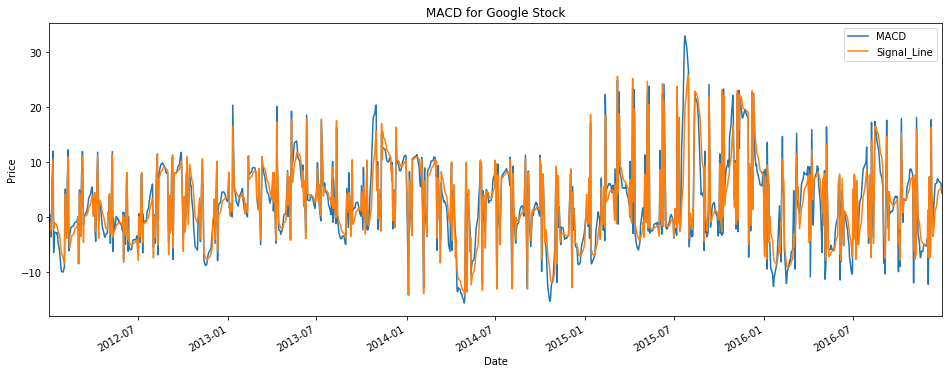

In [9]:
#plot the charts
#Create the List of columns to Keep
column_list = ['MACD','Signal_Line']
df[column_list].plot(figsize=(16,6))
plt.title('MACD for Google Stock')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

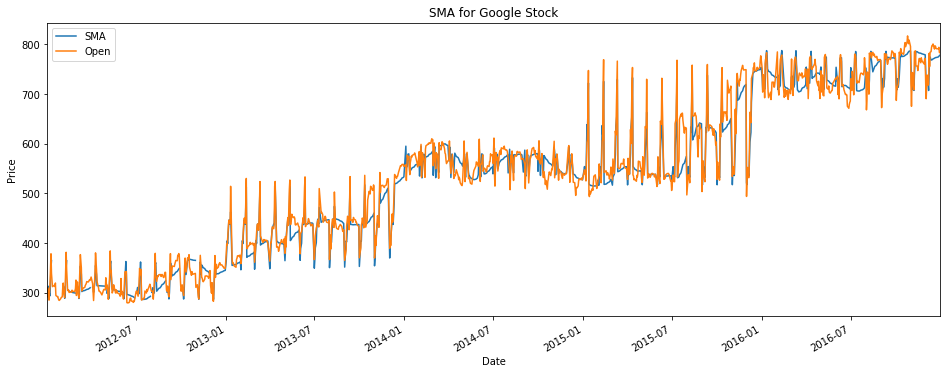

In [10]:
column_list = ['SMA','Open']
df[column_list].plot(figsize=(16,6))
plt.title('SMA for Google Stock')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

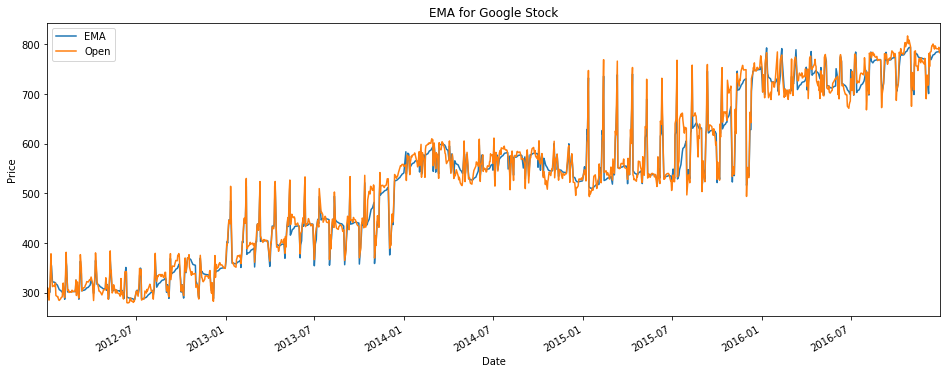

In [11]:
column_list = ['EMA','Open']
df[column_list].plot(figsize=(16,6))
plt.title('EMA for Google Stock')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

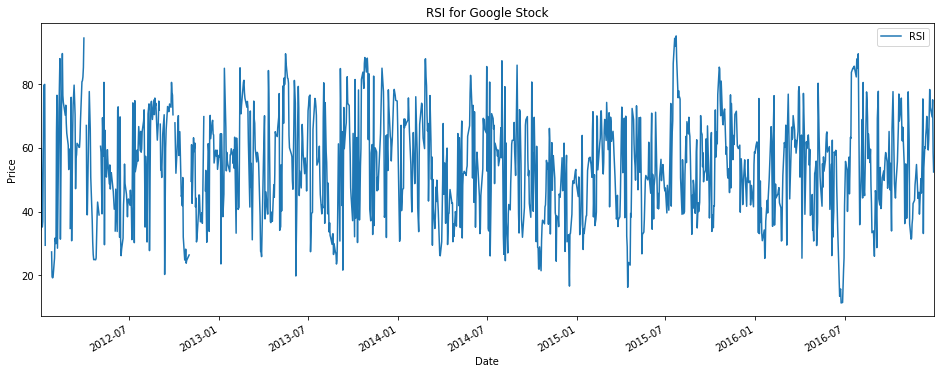

In [12]:
column_list = ['RSI']
df[column_list].plot(figsize=(16,6))
plt.title('RSI for Google Stock')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()